# Chapter 03 - Exercises

## 3.1

### Answers

* see below

In [2]:
# %load ../snippets/data-imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

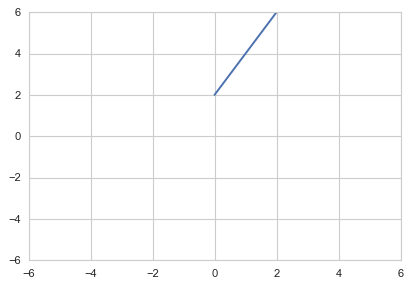

In [3]:
# (0,2) -> (2,6)
plt.plot([0,2], [2,6])
plt.xlim([-6,6])
plt.ylim([-6,6]);

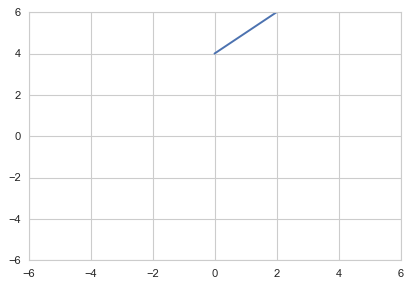

In [4]:
# (0,4) -> (2,6)
plt.plot([0,2], [4,6]);
plt.xlim([-6,6])
plt.ylim([-6,6]);

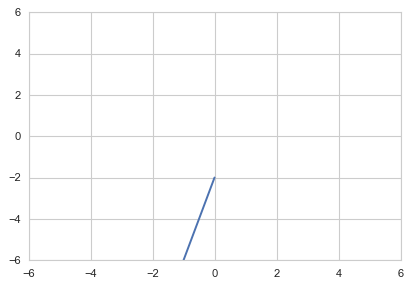

In [5]:
# (0, -2) -> (-1, -6)
plt.plot([0,-1], [-2,-6]);
plt.xlim([-6,6])
plt.ylim([-6,6]);

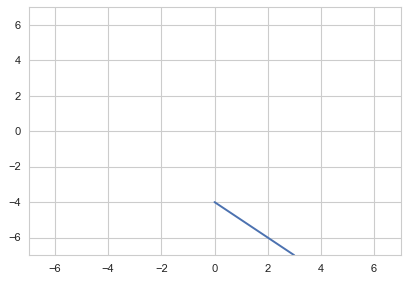

In [6]:
# (0, -4) -> (3, -7)
plt.plot([0,3], [-4,-7]);
plt.xlim([-7,7])
plt.ylim([-7,7]);

## 3.3

### Answers

* a) y = 2.000000 x + 2.000000
* b) y = 1.000000 x + 4.000000
* c) y = 4.000000 x + -2.000000
* d) y = -1.000000 x + -4.000000

In [7]:
def line_from_points(p1, p2):
    slope = (p2[1]-p1[1]) / (p2[0]-p1[0])
    intercept = p1[1] - (slope * p1[0])
    print("y = %f x + %f" % (slope, intercept))

In [8]:
line_from_points((0,2), (2,6))

y = 2.000000 x + 2.000000


In [9]:
line_from_points((0,4), (2,6))

y = 1.000000 x + 4.000000


In [10]:
line_from_points((0, -2), (-1, -6))

y = 4.000000 x + -2.000000


In [11]:
line_from_points((0, -4), (3, -7))

y = -1.000000 x + -4.000000


## 3.5

### Answers

* a) 2, 3
* b) 1, 1
* c) 3, -2
* d) 5, 0
* e) -2, 4

## 3.7

### Answers

* note: the fixed width format is a bit messed up in this file, need to clean it up manually first pre-load
* y = -1.2 x + 2.0

In [12]:
ex3_7 = pd.read_table("../data/ch03/Ex3_7.dat", names=["x", "y"], delimiter='\t')
ex3_7.head()

,x,y
0,-2,4
1,-1,3
2,0,3
3,1,1
4,2,-1


In [13]:
n = ex3_7.x.size
SSxy = ex3_7.cov()['x']['y'] * (n - 1)
SSxx = ex3_7.x.var() * (n-1)
b1 = SSxy / SSxx
b1

-1.2

In [14]:
b0 = ex3_7.y.mean() - (b1 * ex3_7.x.mean())
b0

2.0

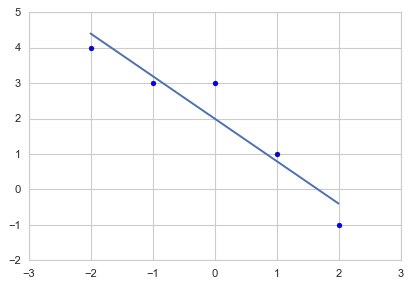

In [15]:
plt.scatter(ex3_7.x, ex3_7.y)
yHat = b1 * ex3_7.x + b0
plt.plot(ex3_7.x, yHat);

## 3.9

### Answers

* a) y = -b1 x + b0; negative
* b) yes
* c) no

## 3.11

### Answers

* d) b1 = 0.0032 - for each 1 vehicle increase, congestion time increases by 0.0032 minutes; b0 = -0.001 -- in the absence of any vehicles, congestion time would be -0.001 minutes

In [16]:
wh = pd.read_fwf("../data/ch03/warehouse.dat", names=["vehicles", "time"], colspecs="infer")

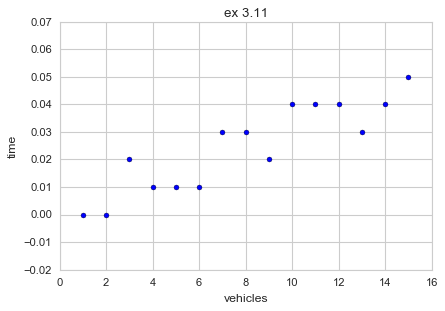

In [17]:
plt.scatter(wh.vehicles, wh.time)

plt.xlabel("vehicles")
plt.ylabel("time")
plt.title("ex 3.11");

In [18]:
n = wh.vehicles.size
SSxy = wh.cov()['vehicles']['time'] * (n - 1)
SSxx = wh.vehicles.var() * (n-1)
b1 = SSxy / SSxx
b1

0.0032142857142857138

In [19]:
b0 = wh.time.mean() - (b1 * wh.vehicles.mean())
b0

-0.0010476190476190438

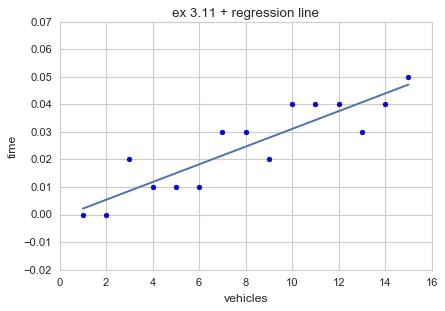

In [20]:
plt.scatter(wh.vehicles, wh.time)
yHat = b1 * wh.vehicles + b0
plt.plot(wh.vehicles, yHat)
plt.xlabel("vehicles")
plt.ylabel("time")
plt.title("ex 3.11 + regression line");

## 3.13

### Answers

* a) y = -0.0023 x + 6.252
* b) b1: for each 1 ppm increase in pectin, sweetness index decreases by 0.0023; b0: in absence of pectin, sweetness index starts at 6.252
* c) 5.558880144308942

In [21]:
oj = pd.read_fwf("../data/ch03/Ojuice.dat", names=["run", "sweetness", "pectin"], colspecs="infer")
oj.head()

,run,sweetness,pectin
0,1,5.2,220
1,2,5.5,227
2,3,6.0,259
3,4,5.9,210
4,5,5.8,224


In [22]:
n = oj.run.size
SSxx = oj.pectin.var() * (n-1)
SSxy = oj.cov()['pectin']['sweetness'] * (n-1)
b1 = SSxy / SSxx
b1

-0.0023106258824640877

In [23]:
b0 = (oj.sweetness.mean() - b1 * oj.pectin.mean())
b0

6.2520679090481686

In [24]:
yHat = b1 * oj.pectin + b0

In [25]:
sweetnessIndex = b1 * 300 + b0
sweetnessIndex

5.558880144308942

## 3.15

### Answers

* estimate line : E(y) = 0.57044 + 0.02642 x
* interpret betas: for each 1 position increase, recall goes up by a factor of 0.02642; at position 0, recall is 0.570

In [26]:
ng = pd.read_fwf("../data/ch03/namegame2.dat", colspecs="infer", names=["position", "recall"])
ng.head()

,position,recall
0,2,0.04
1,2,0.37
2,2,1.00
3,2,0.99
4,2,0.79


In [27]:
n = ng.position.size
SSxx = ng.position.var() * (n-1)
SSxy = ng.cov()['position']['recall'] * (n-1)
b1 = SSxy / SSxx
b1

0.026421957671957666

In [28]:
b0 = (ng.recall.mean() - b1 * ng.position.mean())
b0

0.57044312169312106

## 3.17

* find SSE, s^2, and s

### Answers

* a) 3.7 : (1.6000000000000005, 0.5333333333333335, 0.7302967433402217)
* b) 3.11: (0.0006804761904761908, 5.234432234432237e-05, 0.007234937618550858)
* c) 3.13: (1.0171079500000006, 0.046232179545454576, 0.2150166959690679)
* d) 3.15: (9.172537398399989, 0.06459533379154922, 0.25415612090120754)

In [29]:
import math
def calculate_error_metrics(df):
    SSE = df.residual.apply(lambda x: math.pow(x, 2)).sum()
    sSquared = SSE / (len(df) - 2)
    s = math.sqrt(sSquared)
    return (SSE, sSquared, s)

In [30]:
ex3_7['predicted'] = -1.2 * ex3_7.x + 2.0
ex3_7['residual'] = ex3_7.y - ex3_7.predicted
ex3_7

,x,y,predicted,residual
0,-2,4,4.4,-0.4
1,-1,3,3.2,-0.2
2,0,3,2.0,1.0
3,1,1,0.8,0.2
4,2,-1,-0.4,-0.6


In [31]:
calculate_error_metrics(ex3_7)

(1.6000000000000005, 0.5333333333333335, 0.7302967433402217)

In [32]:
wh['predicted'] = 0.0032142857142857138 * wh.vehicles -0.0010476190476190438
wh['residual'] = wh.time - wh.predicted
calculate_error_metrics(wh)

(0.0006804761904761908, 5.234432234432237e-05, 0.007234937618550858)

In [33]:
oj['predicted'] = -0.0023106258824640877 * oj.pectin + 6.2520679090481686
oj['residual'] = oj.sweetness - oj.predicted
calculate_error_metrics(oj)

(1.0169314421815812, 0.04622415646279914, 0.21499803827662972)

In [34]:
ng['predicted'] =  0.57044 + 0.02642 * ng.position
ng['residual'] = ng.recall - ng.predicted
calculate_error_metrics(ng)

(9.172537398399989, 0.06459533379154922, 0.25415612090120754)

## 3.19

### Answers

* a) scatterplot: x days, y charge : see below
* b) regression model: charge = 2884.877 * days + 223.930
* c) s = ?; interpret: 2496.667 -> we expect the observed charge value to lie within 4993.334000 of the predicted y value
* d) y^+-2s for x = 4 d => (6770.1030232804924, 11763.437023280492, 16756.771023280493)
* e) fraction of states in data with avg charge within +/- 2s of line? 91.7%

In [35]:
hospital = pd.read_fwf("../data/ch03/Hospital.dat", colspecs="infer", names=["state", "charge", "days"])
hospital.head()

,state,charge,days
0,Massachusetts,11680,3.64
1,NewJersey,11630,4.20
2,Pennsylvania,9850,3.84
3,Minnesota,9950,3.11
4,Indiana,8490,3.86


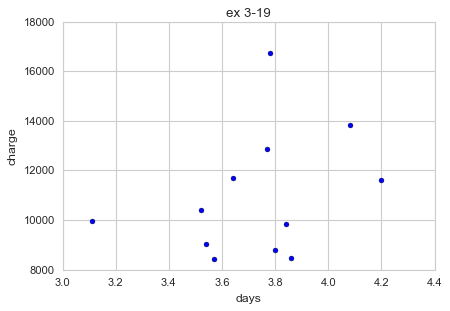

In [36]:
# %load ../snippets/plot
plt.scatter(hospital.days, hospital.charge)

plt.xlabel("days")
plt.ylabel("charge")
plt.title("ex 3-19");

In [37]:
r = np.corrcoef(hospital.days, hospital.charge)[0][1]
b1 = r * (hospital.charge.std() / hospital.days.std())
b0 = hospital.charge.mean() - b1 * hospital.days.mean()
print("b1: %f, b0: %f" % (b1, b0))

b1: 2884.876681, b0: 223.930301


In [38]:
hospital['predicted'] = b1 * hospital.days + b0
hospital['residual'] = hospital.charge - hospital.predicted

calculate_error_metrics(hospital)

(62333443.76391665, 6233344.376391665, 2496.6666530379393)

In [39]:
s = 2496.667
print("we expect the observed charge value to lie within %f of the predicted y value" % (2 * s,))

we expect the observed charge value to lie within 4993.334000 of the predicted y value


In [40]:
predicted = b0 + b1 * 4
predicted

11763.437023280492

In [41]:
predicted + 2 * s

16756.771023280493

In [42]:
predicted - 2 * s

6770.1030232804924

In [43]:
hospital

,state,charge,days,predicted,residual
0,Massachusetts,11680,3.64,10724.881418,955.118582
1,NewJersey,11630,4.20,12340.412359,-710.412359
2,Pennsylvania,9850,3.84,11301.856754,-1451.856754
3,Minnesota,9950,3.11,9195.896777,754.103223
4,Indiana,8490,3.86,11359.554288,-2869.554288
5,Michigan,9020,3.54,10436.393750,-1416.393750
6,Florida,13820,4.08,11994.227158,1825.772842
7,Georgia,8440,3.57,10522.940051,-2082.940051
8,Tennessee,8790,3.80,11186.461687,-2396.461687
9,Texas,10400,3.52,10378.696217,21.303783


In [44]:
n1 = (np.abs(hospital.residual) <= 2 * s).sum()
n1 / len(hospital)

0.91666666666666663

## 3.21

* s = sqrt(SSE / n-2)
* sBeta1 = s / sqrt(SSx)

### Answers

* a) 3.6 -- skip : even # ex.
* b) 3.7 -- t = -5.196, tRej = -3.182 => reject H0

In [45]:
ex3_7

,x,y,predicted,residual
0,-2,4,4.4,-0.4
1,-1,3,3.2,-0.2
2,0,3,2.0,1.0
3,1,1,0.8,0.2
4,2,-1,-0.4,-0.6


In [46]:
n = len(ex3_7)
SSE = np.power(ex3_7.residual, 2).sum()
s = math.sqrt(SSE / (n - 2))
SSx = ex3_7.x.var() * (n - 1)
b1 = -1.2
sBeta1 = s / math.sqrt(SSx)
t = b1 / sBeta1
t

-5.19615242270663

In [47]:
# figure out our rejection region
alpha = 0.05
tRej = stats.t.ppf(1 - (alpha / 2), n - 2)
tRej

3.1824463052842629

## 3.23

### Answers

* [-0.003864, -0.000757]: We can say with 95% confidence that the sweetness index will decrease between 0.0039 and 0.0008 for each 1 unit increase in pectin.

In [48]:
n = len(oj)
SSE = np.power(oj.residual, 2).sum()
s = math.sqrt(SSE / (n - 2))
SSx = oj.pectin.var() * (n - 1)
beta1 = -0.0023106258824640877
sBeta1 = s / math.sqrt(SSx)
t = beta1 / sBeta1
t

-2.5535154460648624

In [49]:
# figure out our rejection region
alpha = 0.10
tRej = stats.t.ppf(1 - (alpha / 2), n - 2)
tRej

1.7171443743802419

In [50]:
# generate a confidence interval for our beta^1 param
# beta1 +/- tRej * sBeta1
ciLow = beta1 - tRej * sBeta1
ciHigh = beta1 + tRej * sBeta1
print("[%f, %f]" %(ciLow, ciHigh))

[-0.003864, -0.000757]


## 3.25

### Background

* n = 39
* beta1 = 0.88
* sBeta1 = .14

### Answers

* a) reject H0 => positively related
* b) [0.643807, 1.116193] For every 1 degree increase in head movement, body plus head rotation will increase between 0.644 and 1.116 degrees.
* c) No - 1 falls within the CI, so the slope does not differ significantly from 1.

In [51]:
n = 39
beta1 = 0.88
sBeta1 = 0.14
t = beta1 / sBeta1
t

6.285714285714286

In [52]:
# figure out our rejection region
alpha = 0.05
tRej = stats.t.ppf(1 - alpha, n - 2)
tRej

1.6870936167109873

In [53]:
# generate a confidence interval for our beta^1 param
# beta1 +/- tRej * sBeta1
ciLow = beta1 - tRej * sBeta1
ciHigh = beta1 + tRej * sBeta1
print("[%f, %f]" %(ciLow, ciHigh))

[0.643807, 1.116193]


## 3.27

### Answers

* t = 2.5969345194435576 => reject H0

In [54]:
boxing = pd.read_fwf("../data/ch03/boxing2.dat", colspecs="infer", names=["lactate", "recovery"])
boxing.head()

,lactate,recovery
0,3.8,7
1,4.2,7
2,4.8,11
3,4.1,12
4,5.0,12


In [55]:
r = np.corrcoef(boxing.lactate, boxing.recovery)[0][1]
beta1 = r * (boxing.recovery.std() / boxing.lactate.std())
beta0 = boxing.recovery.mean() - beta1 * boxing.lactate.mean()
boxing['prediction'] = beta0 + beta1 * boxing.lactate
boxing['residual'] = boxing.recovery - boxing.prediction
calculate_error_metrics(boxing)

(256.4166666666667, 18.315476190476193, 4.279658419836354)

In [56]:
SSE = 256.4166666666667
sSquared = 18.315476190476193
s = 4.279658419836354

In [57]:
SSx = boxing.lactate.var() * (len(boxing) - 1)
sBeta1 = s / math.sqrt(SSx)
t = beta1 / sBeta1
t

2.5969345194435576

In [58]:
# figure out our rejection region
alpha = 0.1
tRej = stats.t.ppf(1 - (alpha / 2), n - 2)
tRej

1.6870936167109873

## 3.29

### Background

* E(y) = 0.57044 + 0.02642 x

### Answers

* t = 2.858203440423017 => reject H0

In [59]:
ng.head()

,position,recall,predicted,residual
0,2,0.04,0.62328,-0.58328
1,2,0.37,0.62328,-0.25328
2,2,1.00,0.62328,0.37672
3,2,0.99,0.62328,0.36672
4,2,0.79,0.62328,0.16672


In [60]:
beta1 = 0.02642
SSE = np.power(ng.residual, 2).sum()
n = len(ng)
SSx = ng.position.var() * (n - 1)
s = math.sqrt(SSE / (n - 2))
sBeta1 = s / math.sqrt(SSx)

In [61]:
t = beta1 / sBeta1
t

2.858203440423017

In [62]:
# figure out our rejection region
alpha = 0.01
tRej = stats.t.ppf(1 - (alpha / 2), n - 2)
tRej

2.6108952945291004

## 3.31

### Answers

* r = -0.94868329805051377
* r^2 = 0.9000

In [63]:
ex3_7.head()

,x,y,predicted,residual
0,-2,4,4.4,-0.4
1,-1,3,3.2,-0.2
2,0,3,2.0,1.0
3,1,1,0.8,0.2
4,2,-1,-0.4,-0.6


In [64]:
num = ex3_7.cov()['x']['y']
denom = math.sqrt(ex3_7.x.var() * ex3_7.y.var())
r = num/denom
rSquared = math.pow(r, 2)
print("r: %f, rSquared: %f" % (r, rSquared))

r: -0.948683, rSquared: 0.900000


## 3.33

### Answers

* yes - it likely shows a positive association: the higher the IQ, the higher the GPA

## 3.35

### Answers

* positive: past 3-day sales vs. future 1-day sales
* negative: sort rank and sales: the lower the rank of the product on a given search results page, the higher the predicted sales for that product

## 3.37

### Answers

* a & b)
* piano - .447 : moderately strong positive association (.199809 - 20% of variability in time explained by view)
* bench - .057 : weak positive association (.3% of variability in time explained by view)
* motorbike - .619 : fairly strong positive (38.3% of variability in time explained by view)
* armchair - .294 : fairly weak positive (8.6% ...)
* teapot - .949 : very strong positive association (90% ...)

* c) at alpha = 0.05, reject H0 for piano, motorbike, and teapot, fail to reject for bench and armchair

In [65]:
alpha = 0.05
tRej = stats.t.ppf(1 - (alpha / 2), n - 2)
tRej

1.9768109936200895

## 3.39

### Answers

* a) y = beta0 + beta1x
* b) H0: beta1 = 0, H1: beta1 > 0
* c) r = -.26; fairly weak negative correlation.  No: talpha = 1.656, t = -3.117, fail to reject H0

In [66]:
r = -0.26
n = 136
t = (r * math.sqrt(n - 2)) / (math.sqrt(1 - math.pow(r, 2)))
t

-3.1169125292737547

In [67]:
alpha = 0.05
tRej = stats.t.ppf(1 - (alpha), n - 2)
tRej

1.6563045418965052

## 3.41

### Answers

* r = 0.570, r^2 = 0.325
* 32.5% of variability in recovery time is explained by lactate levels

In [68]:
r = boxing.corr()['lactate']['recovery']
rSq = math.pow(r, 2)
print("r: %f , r^2: %f" % (r, rSq))

r: 0.570183 , r^2: 0.325108


## 3.43

### Answers

* a) negative
* b) -0.09086

## 3.45

### Background

* n = 20
* yHat = 2.1 + 3.4x
* mean x = 2.5
* mean y = 10.6
* SSxx = 4.77
* SSyy = 59.21
* SSxy = 16.22

### Answers

* a) sse: 4.055199, s^2: 0.225289
* b) 95% CI for E(y) when x = 2.5; interpret
* c) 95% CI for E(y) when x = 2.0; interpret
* d) 95% CI for E(y) when x = 3.0; interpret
* e) what happens to CI width as x moves away from mean-x? : gets wider
* f) 95% CI for individual y when x = 3.0; interpret

In [69]:
n = 20
def yHat(x):
    return 2.1 + 3.4 * x
xBar = 2.5
yBar = 10.6
SSxx = 4.77
SSyy = 59.21
SSxy = 16.22

In [70]:
beta1 = SSxy / SSxx
SSE = SSyy - beta1 * SSxy
sSquared = SSE / (n - 2)
print("sse: %f, s^2: %f" % (SSE, sSquared))

sse: 4.055199, s^2: 0.225289


In [71]:
sBeta1 = math.sqrt(sSquared) / math.sqrt(SSxx)
sBeta1

0.21732548231248094

In [72]:
import scipy.stats as stats

In [73]:
# ci for mean y

def ci_mean(yHat, xp, xBar, SSxx, s, n, alpha):
    t = stats.t.ppf(1 - (alpha / 2), n - 2)
    modifier = t * s * math.sqrt(1 / n + math.pow(xp - xBar, 2) / SSxx)
    return ((yHat - modifier, yHat + modifier), (yHat, modifier))

In [74]:
xp = 2.5
ci_mean(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.05)

((10.377020580246754, 10.822979419753246), (10.6, 0.22297941975324528))

In [75]:
xp = 2.0
ci_mean(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.05)

((8.5808808450033229, 9.2191191549966778), (8.9, 0.31911915499667787))

In [76]:
xp = 3.0
ci_mean(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.05)

((11.980880845003322, 12.619119154996676),
 (12.299999999999999, 0.31911915499667787))

In [77]:
# ci for mean y

def ci_prediction(yHat, xp, xBar, SSxx, s, n, alpha):
    t = stats.t.ppf(1 - (alpha / 2), n - 2)
    modifier = t * s * math.sqrt(1 + 1 / n + math.pow(xp - xBar, 2) / SSxx)
    return ((yHat - modifier, yHat + modifier), (yHat, modifier))

In [78]:
xp = 3.0
ci_prediction(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.05)

((11.252988315368126, 13.347011684631871),
 (12.299999999999999, 1.0470116846318731))

## 3.47

### Answers

* a) 90% prediction CI for x = 10
* b) 90% mean CI for x = 10
* c) compare: as expected, the prediction interval (+/- 0.0444) is wider than the mean interval (+/- 0.347)
* d) yes in both cases, but for prediction, there's a lower limit

In [79]:
n = len(wh)
SSxx = wh.vehicles.var() * (n - 1)
SSyy = wh.time.var() * (n - 1)
SSxy = wh.cov()['time']['vehicles'] * (n - 1)
yBar = wh.time.mean()
xBar = wh.vehicles.mean()

beta1 = SSxy / SSxx
beta0 = yBar - beta1 * xBar

def yHat(x):
    return beta0 + beta1 * x

SSE = SSyy - beta1 * SSxy
sSquared = SSE / (n - 2)
print("sse: %f, s^2: %f" % (SSE, sSquared))

sse: 0.000680, s^2: 0.000052


In [80]:
xp = 10
ci_prediction(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.10)

((0.017774131608907701, 0.044416344581568491),
 (0.031095238095238096, 0.013321106486330395))

In [81]:
xp = 10
ci_mean(yHat(xp), xp, xBar, SSxx, math.sqrt(sSquared), n, 0.10)

((0.027449782335920853, 0.034740693854555339),
 (0.031095238095238096, 0.0036454557593172442))

## 3.49

### Answers

* a) predicted value is between 1.0516 and 6.6347 with confidence level of 95%
* b) the interval would be narrower
* c) no - this extrapolates outside the range of values used as training data for building the model

## 3.51

### Answers

* a) y = b0 + b1 x;  [duration (m) = b0 + b1 * frequency (days/yr)]
* b) y = 155.911944 + -1.086374 * x
* c) yes: t = -2.05, tRej = 1.83
    - ?? not clear on why the answer key indicates this fails to reject H0
* d) yPred @ x = 25 w/ 95% CI, -21.581917349936532, 279.08710195223887
    - 128.75259230115117 +/- 150.3345096510877
    - ?? answer key shows 238.76 +/- 150.32 -> not clear on how they arrived at that base prediction value

In [82]:
sports = pd.read_table("../data/ch03/Japansports.dat", names=["activity", "frequency", "duration"])
sports.head()

,activity,frequency,duration
0,Jogging,135,43
1,Cycling,68,99
2,Aerobic,44,61
3,Swimming,39,60
4,Volleyball,30,80


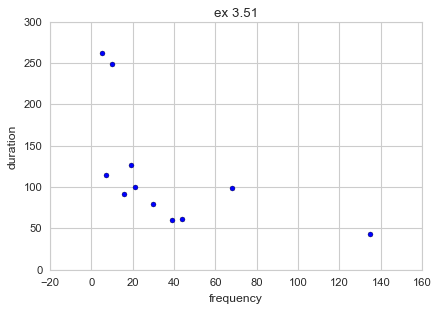

In [99]:
plt.scatter(sports.frequency, sports.duration)

plt.xlabel("frequency")
plt.ylabel("duration")
plt.title("ex 3.51");

In [84]:
n = len(sports)
SSxy = sports.cov()['frequency']['duration'] * (n - 1)
SSxx = sports.frequency.var() * (n - 1)
b1 = SSxy / SSxx
b0 = sports.duration.mean() - b1 * sports.frequency.mean()

In [85]:
print("y = %f + %f * x" % (b0, b1))

y = 155.911944 + -1.086374 * x


In [86]:
sports['prediction'] = b0 + b1 * sports.frequency
sports['residual'] = sports.duration - sports.prediction
sports

,activity,frequency,duration,prediction,residual
0,Jogging,135,43,9.251444,33.748556
1,Cycling,68,99,82.038507,16.961493
2,Aerobic,44,61,108.111485,-47.111485
3,Swimming,39,60,113.543355,-53.543355
4,Volleyball,30,80,123.320722,-43.320722
5,Tennis,21,100,133.098089,-33.098089
6,Softball,16,91,138.529959,-47.529959
7,Baseball,19,127,135.270837,-8.270837
8,Skating,7,115,148.307326,-33.307326
9,Skiing,10,249,145.048203,103.951797


In [87]:
SSE = sports.residual.apply(lambda x: math.pow(x, 2)).sum()
SSE

36164.7602200759

In [88]:
sSquared = SSE / (n - 2)
sSquared

4018.306691119544

In [89]:
s = math.sqrt(sSquared)
s

63.39011508996923

In [90]:
sBeta1 = s / math.sqrt(SSxx)
sBeta1

0.5296202460925241

In [91]:
t = b1 / sBeta1
t

-2.0512321541195022

In [92]:
tRej = stats.t.ppf(0.05, n - 2)
tRej

-1.8331129326536337

In [93]:
def yHat(x):
    return b0 + b1 * x

In [94]:
xp = 25
alpha = 0.05
yHat(xp)

128.75259230115117

In [95]:
xp = 25
ci_prediction(yHat(xp), xp, sports.frequency.mean(), SSxx, math.sqrt(sSquared), n, 0.05)

((-21.581917349936532, 279.08710195223887),
 (128.75259230115117, 150.3345096510877))

In [96]:
b0

155.91194425759289

In [97]:
b1

-1.0863740782576692

In [98]:
b0 + b1 * 25

128.75259230115117